### Challenge Problem 2.3



In [1]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt



In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

#### Simulating falling object with air resistance and  and gravitational force :

$$F_d = k_2v^2$$

$$F=\frac{GMm}{(R+y)^2}=\frac{gm}{(1+y/R)^2},$$

Impact Velocity is -29.982864 m/s


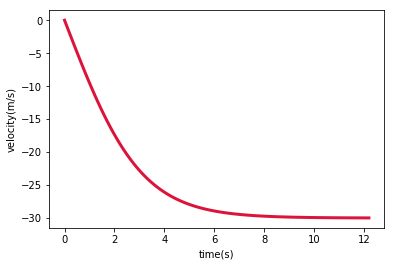

In [23]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
k2 = g*mass/vt**2  # drag coeff.
R=6.37e6           # Radius of Earth

dt = 0.1           # time step


p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    
    gforce = mass*g / (1+(p.y/R)**2) #Gravitational force depends on y 
    fy = -gforce-k2*p.v*abs(p.v)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])

pyplot.plot(t_data, v_data, color="#DC143C", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

v_impact=(v_data[len(v_data)-1] + v_data[len(v_data)-2]) / 2
print('Impact Velocity is %f m/s' % (v_impact))

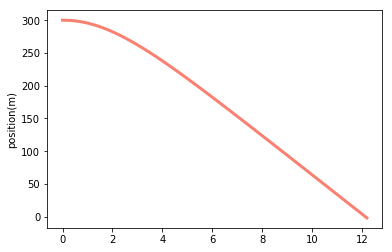

In [24]:
pyplot.plot(t_data, y_data, color="#FA8072", ls='-', lw=3)
pyplot.ylabel('position(m)');

#### Simulating falling object with  gravitational force :


$$F=\frac{GMm}{(R+y)^2}=\frac{gm}{(1+y/R)^2},$$

*********************************** 

Impact Velocity is -76.930000 m/s 

*********************************** 



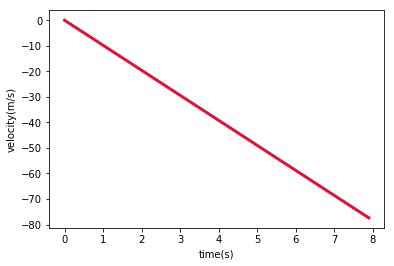

In [29]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
R=6.37e6           # Radius of Earth

dt = 0.1           # time step


p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    
    gforce = mass*g / (1+(p.y/R)**2) #Gravitational force depends on y 
    fy = -gforce
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])

pyplot.plot(t_data, v_data, color="#DC143C", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

v_impact=(v_data[len(v_data)-1] + v_data[len(v_data)-2]) / 2

print ('*********************************** \n')
print('Impact Velocity is %f m/s \n' % (v_impact))
print ('*********************************** \n')


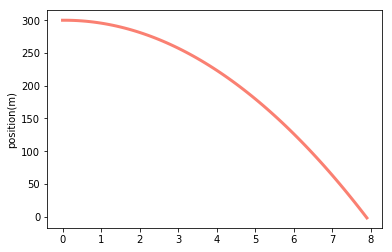

In [26]:
pyplot.plot(t_data, y_data, color="#FA8072", ls='-', lw=3)
pyplot.ylabel('position(m)');

#### Finding the altitude for which the impact velocity differs by one percent from its value under a constant acceleration 

************************************************************** 

   around y0= 1630000  the difference is more than 1percent 

************************************************************** 



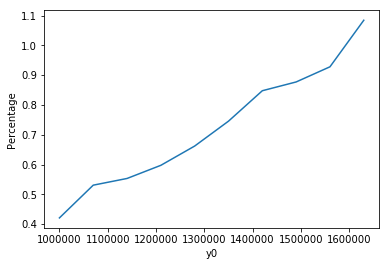

In [71]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
#y0 = 300.          # initial position
v0 = 0.            # initial velocity
R=6.37e6           # Radius of Earth

dt = .5           # time step


p = particle(mass, y0, v0)

percentage=[]
y_star_array=[]


y0_array=np.linspace(1000000,1700000,10,endpoint=False)

for y0 in y0_array:
    y = [y0] # since we do not know the size of the arrays, we define first a python list
    v = [v0] # the append method is more efficient for lists than arrays
    t = [0.]
    
    p.y = y0
    p.v=v0

    while p.y > 0.:
    
        gforce = mass*g / (1+(p.y/R)**2) #Gravitational force depends on y 
        fy = -gforce
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    y_data = np.array(y)
    v_data = np.array(v)
    
    v_impact1 = (v_data[len(v_data)-1] + v_data[len(v_data)-2]) / 2
   
    y = [y0] # since we do not know the size of the arrays, we define first a python list
    v = [v0] # the append method is more efficient for lists than arrays
    t = [0.]
    
    p.y = y0
    p.v= v0

    while p.y > 0.:
    
        gforce = mass*g  #Constant Gravitational force  
        fy = -gforce
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    y_data = np.array(y)
    v_data = np.array(v)
    
    v_impact0 = (v_data[len(v_data)-1] + v_data[len(v_data)-2]) / 2
    
    percent=abs(100 * (v_impact1-v_impact0) / v_impact0)
    percentage.append(abs(100 * (v_impact1-v_impact0) / v_impact0)) 
    
    if (percent >= 1):
        
        y_star_array.append(y0)



pyplot.plot(y0_array,percentage)  
pyplot.xlabel('y0')
pyplot.ylabel('Percentage');




y_star=y_star_array[0] # y0 which the difference is more than 1 percent

print ('************************************************************** \n')
print('   around y0= %.f  the difference is more than 1percent \n' % (y_star))
print ('************************************************************** \n')

